# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Muat dataset
df = pd.read_csv('../data/weather.csv', parse_dates=['local_datetime', 'fetch_time'])

# Tampilkan 5 baris pertama
df.head()

,provinsi,kotkab,kecamatan,desa,lon,lat,datetime,local_datetime,temperature,humidity,...,wind_degree,cloud_cover,precipitation,weather,weather_description,visibility,hour,date,fetch_time,unique_key
0,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 03:00:00+00:00,2025-06-12 10:00:00,31,66,...,91,45,0.0,1,Cerah,29600,10,2025-06-12,2025-06-12 03:50:55.156094,20250612100000
1,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 04:00:00+00:00,2025-06-12 11:00:00,32,63,...,71,9,0.0,0,Cerah,19995,11,2025-06-12,2025-06-12 03:56:08.978520,20250612110000
2,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 05:00:00+00:00,2025-06-12 12:00:00,32,62,...,71,12,0.0,1,Cerah,19995,12,2025-06-12,2025-06-12 04:49:59.213035,20250612120000
3,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 06:00:00+00:00,2025-06-12 13:00:00,32,62,...,71,52,0.5,1,Cerah,19995,13,2025-06-12,2025-06-12 03:50:55.156094,20250612130000
4,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 07:00:00+00:00,2025-06-12 14:00:00,31,68,...,59,62,0.5,2,Cerah Berawan,7207,14,2025-06-12,2025-06-12 03:56:08.978520,20250612140000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   provinsi             120 non-null    object        
 1   kotkab               120 non-null    object        
 2   kecamatan            120 non-null    object        
 3   desa                 120 non-null    object        
 4   lon                  120 non-null    float64       
 5   lat                  120 non-null    float64       
 6   datetime             120 non-null    object        
 7   local_datetime       120 non-null    datetime64[ns]
 8   temperature          120 non-null    int64         
 9   humidity             120 non-null    int64         
 10  wind_speed           120 non-null    float64       
 11  wind_direction       120 non-null    object        
 12  wind_degree          120 non-null    int64         
 13  cloud_cover          

<Figure size 1500x1000 with 0 Axes>

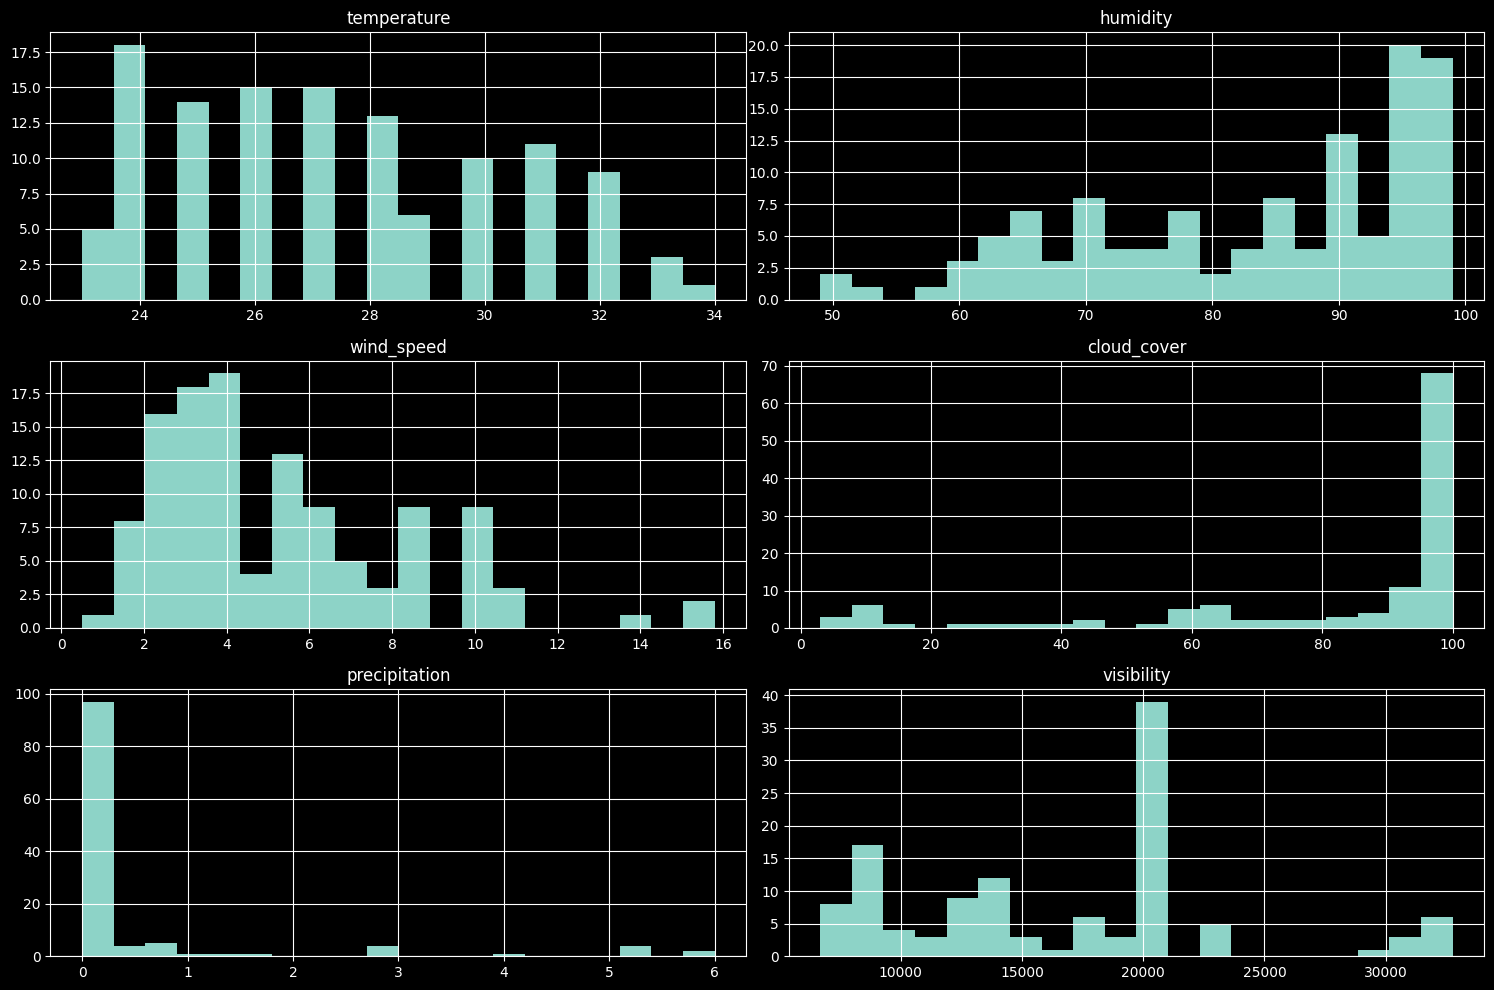

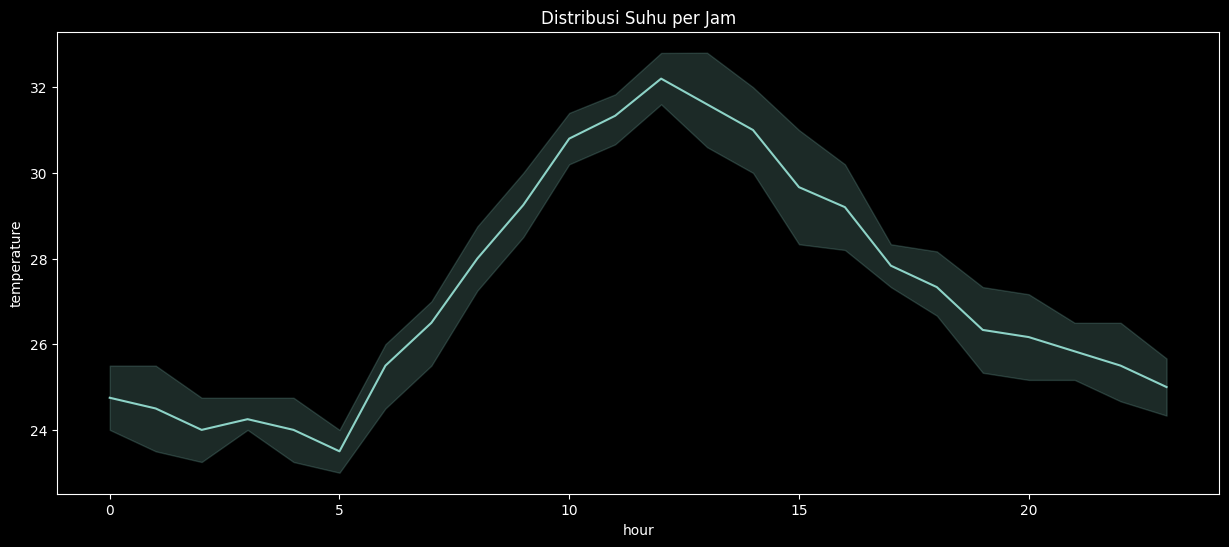

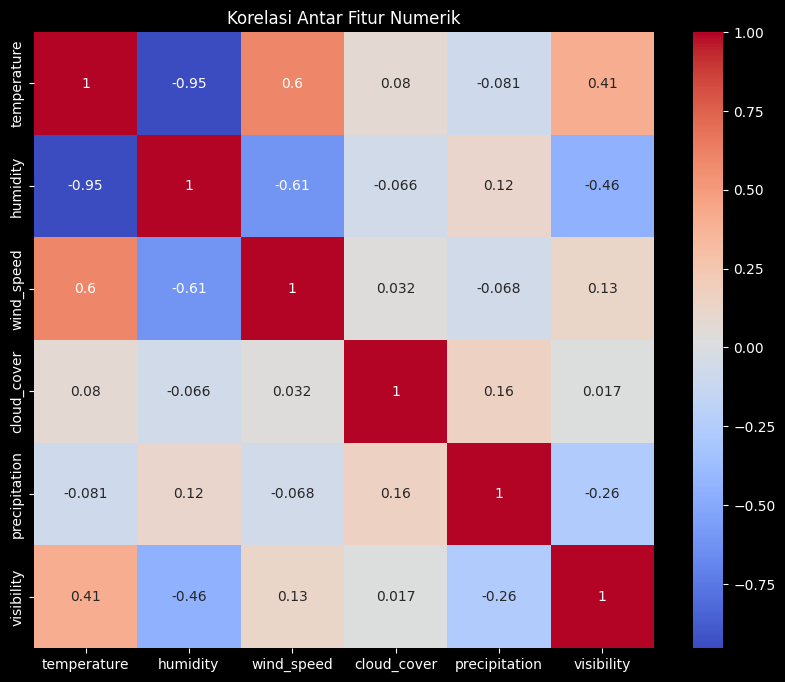

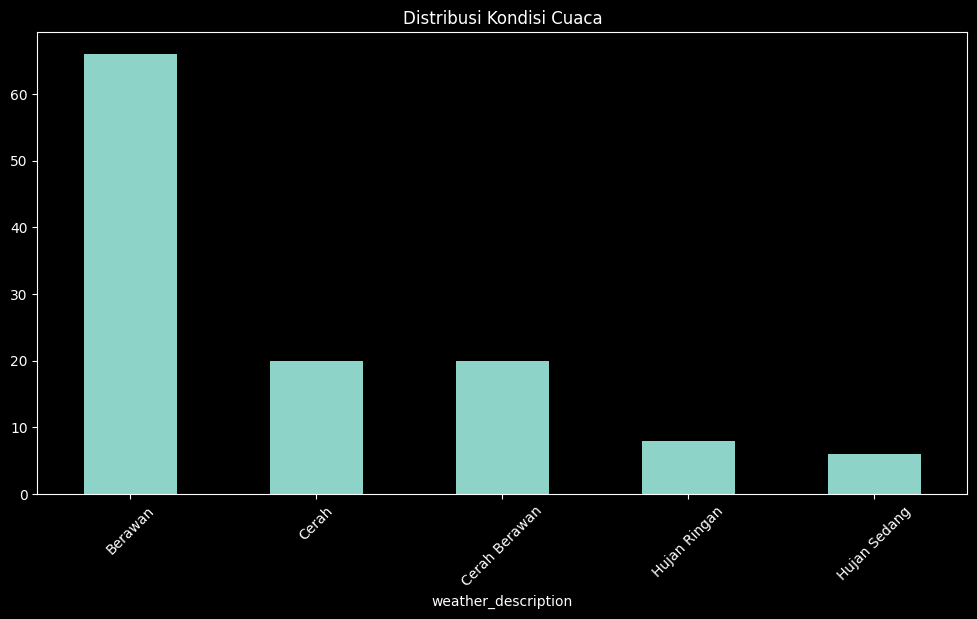

In [5]:
# 1. Info dasar dataset
print("Info Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# 2. Cek missing values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# 3. Analisis distribusi
plt.figure(figsize=(15, 10))
numerical_features = ['temperature', 'humidity', 'wind_speed', 'cloud_cover', 'precipitation', 'visibility']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 4. Analisis temporal (contoh: suhu per jam)
plt.figure(figsize=(15, 6))
sns.lineplot(x='hour', y='temperature', data=df)
plt.title('Distribusi Suhu per Jam')
plt.show()

# 5. Korelasi antar fitur numerik
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

# 6. Analisis kondisi cuaca
weather_counts = df['weather_description'].value_counts()
plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar')
plt.title('Distribusi Kondisi Cuaca')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# 1. Penanganan data duplikat
df = df.drop_duplicates(subset=['unique_key'], keep='last')

# 2. Ekstrak fitur waktu
df['day_of_week'] = df['local_datetime'].dt.dayofweek
df['month'] = df['local_datetime'].dt.month

# 3. Pemilihan fitur
features = ['hour', 'day_of_week', 'month', 'temperature', 'humidity', 
            'wind_speed', 'cloud_cover', 'precipitation', 'weather_description']

df = df[features]

# 4. Transformasi fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['hour', 'day_of_week', 'month', 'temperature', 
                                   'humidity', 'wind_speed', 'cloud_cover', 'precipitation']),
        ('cat', OneHotEncoder(), ['weather_description'])
    ])

# 5. Buat pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# 6. Transformasi data
preprocessed_data = pipeline.fit_transform(df)

# Simpan pipeline untuk penggunaan di automasi
import joblib
joblib.dump(pipeline, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']